# Chapter 2 - Golan Heights
## Hanna Asefaw

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import timescalePlotter as ts_plotter
import pygmt
import pmagpy.pmag as pmag

In [2]:
# import the data
gh_data = pd.read_csv("./PISamples.csv")
gh_data.columns = ['site', 'n', 'int', 'B_sigma_uT', 'b_sigma_perc', 'vadm', 'age','Lat', 'Lon']
res = gh_data['age'].str.split(" ", expand  = True)
gh_data['age']= ["" if g == "nan" else float(g) for g in res[0]]
gh_data['age']= pd.to_numeric(gh_data['age'])

gh_data['age_sigma']= ["" if g == "nan" else float(g) for g in res[2]]
gh_data['age_sigma']= pd.to_numeric(gh_data['age_sigma'])

ant_data = pd.read_csv("./AntarcticaPISites.csv")
collab_data = pd.read_csv("./collaborator_studies.csv")

ice_data = collab_data[collab_data['author'] == "Cromwell et al. 2014"]
ice_data = ice_data.dropna(subset = ["int", "vadm"])

In [3]:
# Golan Heights summary 
n = gh_data.site.size
b = gh_data['int'].mean()
b_std= gh_data['int'].std()
b_stderr = b_std/np.sqrt(n)
b_median = gh_data['int'].median()

print("Total Sites: \t\t", n)

print("\n\nMean Intensity:\t\t", round(b,2))
print("Standard deviation:\t", round(b_std,2))
print("Std Error intensity:\t", round(b_stderr,2))
print("Median:\t\t\t", round(b_median,2))
      
      
vadm = gh_data['vadm'].mean()
vadmStd = gh_data['vadm'].std()
vadmStdError= vadmStd/np.sqrt(n)
vadmMedian = gh_data['vadm'].median()

print("\n\nMean VADM:\t\t", round(vadm,2))
print("Standard deviation:\t", round(vadmStd,2))
print("Std Error VADM:\t\t", round(vadmStdError,2))
print("Median:\t\t\t", round(vadmMedian,2))

Total Sites: 		 23


Mean Intensity:		 34.54
Standard deviation:	 13.58
Std Error intensity:	 2.83
Median:			 30.52


Mean VADM:		 64.87
Standard deviation:	 25.47
Std Error VADM:		 5.31
Median:			 57.36


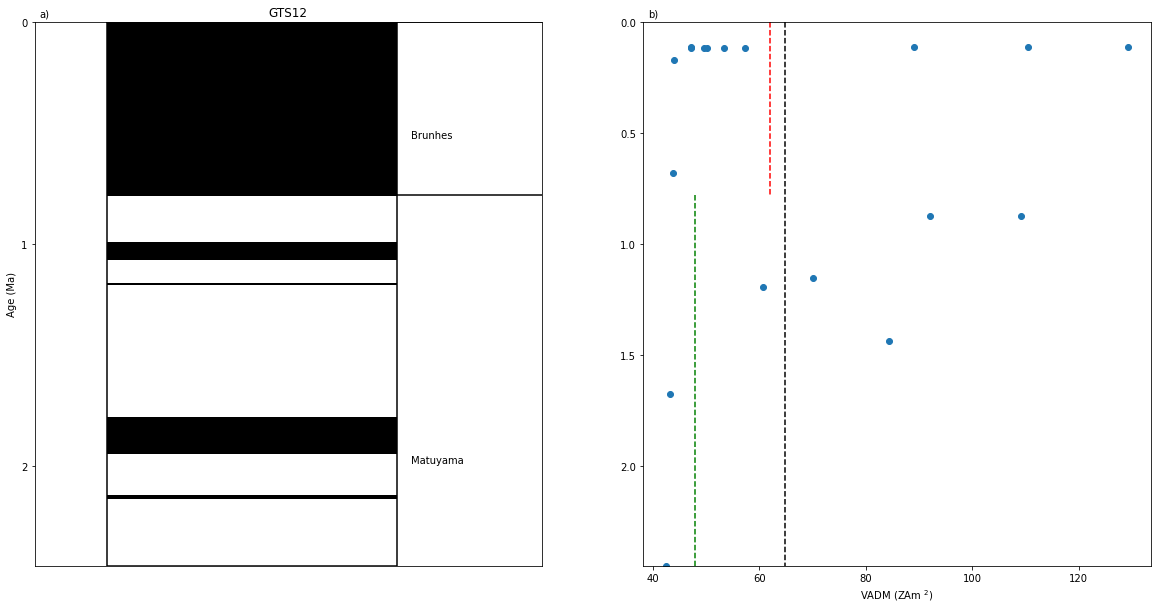

In [4]:
# golan heights- geomagnetic polarity timescale and vadms
fig = plt.figure(2, (20, 10))
maxAge = gh_data['age'].max()

#gpts
ax=fig.add_subplot(121)
labels = ["Brunhes", "Matuyama", "Gauss", "Gilbert", ""]
bounds = [0,.78, 2.59,3.6,5.33, 10]
ts_plotter.modified_do_TS(ax,0.,maxAge, label=labels, labelbounds = bounds )

ax.set_ylim(0,maxAge)
ax.invert_yaxis()
ax.set_ylabel("Age (Ma)")
ax.text(.01,1.01,'a)',transform=ax.transAxes)



#vadm
ax=fig.add_subplot(122)
plt.plot(gh_data['vadm'], gh_data['age'].values, 'o')
plt.xlabel("VADM (ZAm $^2$)")
plt.ylim(0,maxAge)
frame1 = plt.gca()
frame1.axes.set_ylabel("")
ax.invert_yaxis()
ax.text(.01,1.01,'b)',transform=ax.transAxes)



plt.plot([62,62],[0,.78],'r--') # from Ziegler et al
plt.plot([48,48],[.78,10],'g--')# from Ziegler et al

mean_vadm = gh_data['vadm'].mean()
plt.plot([mean_vadm,mean_vadm],[0,maxAge],'k--');

In [5]:
# similar studies summary
datasets = [gh_data, ant_data, ice_data]
study = ['Golan Heights', "Antarctica", "Iceland"]

for data, loc in zip(datasets, study):
    print(loc)
    print("\t {:.2f} \u00B1  {:.2f} \u03BCT".format(data['int'].mean(), data['int'].std()/np.sqrt(data['int'].size)))
    print("\t {:.2f} \u00B1  {:.2f} ZAm^2".format(data['vadm'].mean(), data['vadm'].std()/np.sqrt(data['vadm'].size)))
    print("") 

Golan Heights
	 34.54 ±  2.83 μT
	 64.87 ±  5.31 ZAm^2

Antarctica
	 33.01 ±  2.59 μT
	 43.40 ±  3.41 ZAm^2

Iceland
	 42.94 ±  1.05 μT
	 59.90 ±  1.46 ZAm^2



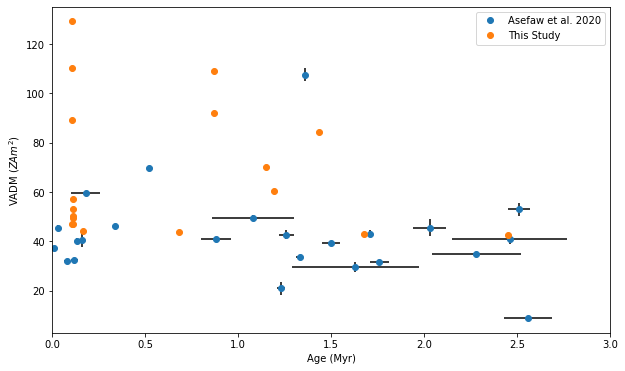

In [6]:
# vadm vs. age (golan heights and antarctica)
plt.figure(1, (10,6))
plt.plot(ant_data['age'],ant_data['vadm'], "o" , label = "Asefaw et al. 2020")
for i in range(ant_data['age'].size):
    plt.errorbar(ant_data['age'].values[i],ant_data['vadm'].values[i], xerr = ant_data['age_sigma'].values[i], yerr = ant_data['vadm_sigma'].values[i], color="k")
    
    
plt.plot( gh_data['age'], gh_data['vadm'],"o", label = "This Study")
for i in range(gh_data['vadm'].size):
    plt.errorbar( gh_data['age'].values[i],gh_data['vadm'].values[i], color = "k")

    
plt.xlim([0,3])
    
plt.ylabel("VADM ($ZAm^2$)")
plt.xlabel("Age (Myr)")
plt.legend();

In [7]:
# PINT database- filter 
pint = pd.read_csv("./PINT15.csv")
pint = pint.dropna(subset = ["DF%", "DF", "VDM/VADM"])
pint['VDM/VADM']*=10



int_m_filter= ['LTD-T+', "M+", "ST+", "T+", "WT+"]
n_filter = 3
df_perc_filter= 10
df_filter = 4
age_filter = 5



pint = pint[pint['IntM'].isin(int_m_filter) & (pint['AGE']<=age_filter) ]
pint= pint[(pint['Nint']>=n_filter)  & ((pint['DF%']<=df_perc_filter) | (pint['DF']<=df_filter))]
print("N = {} \t pint filtered 0 - 5 Myr".format(pint['AGE'].size))

N = 328 	 pint filtered 0 - 5 Myr


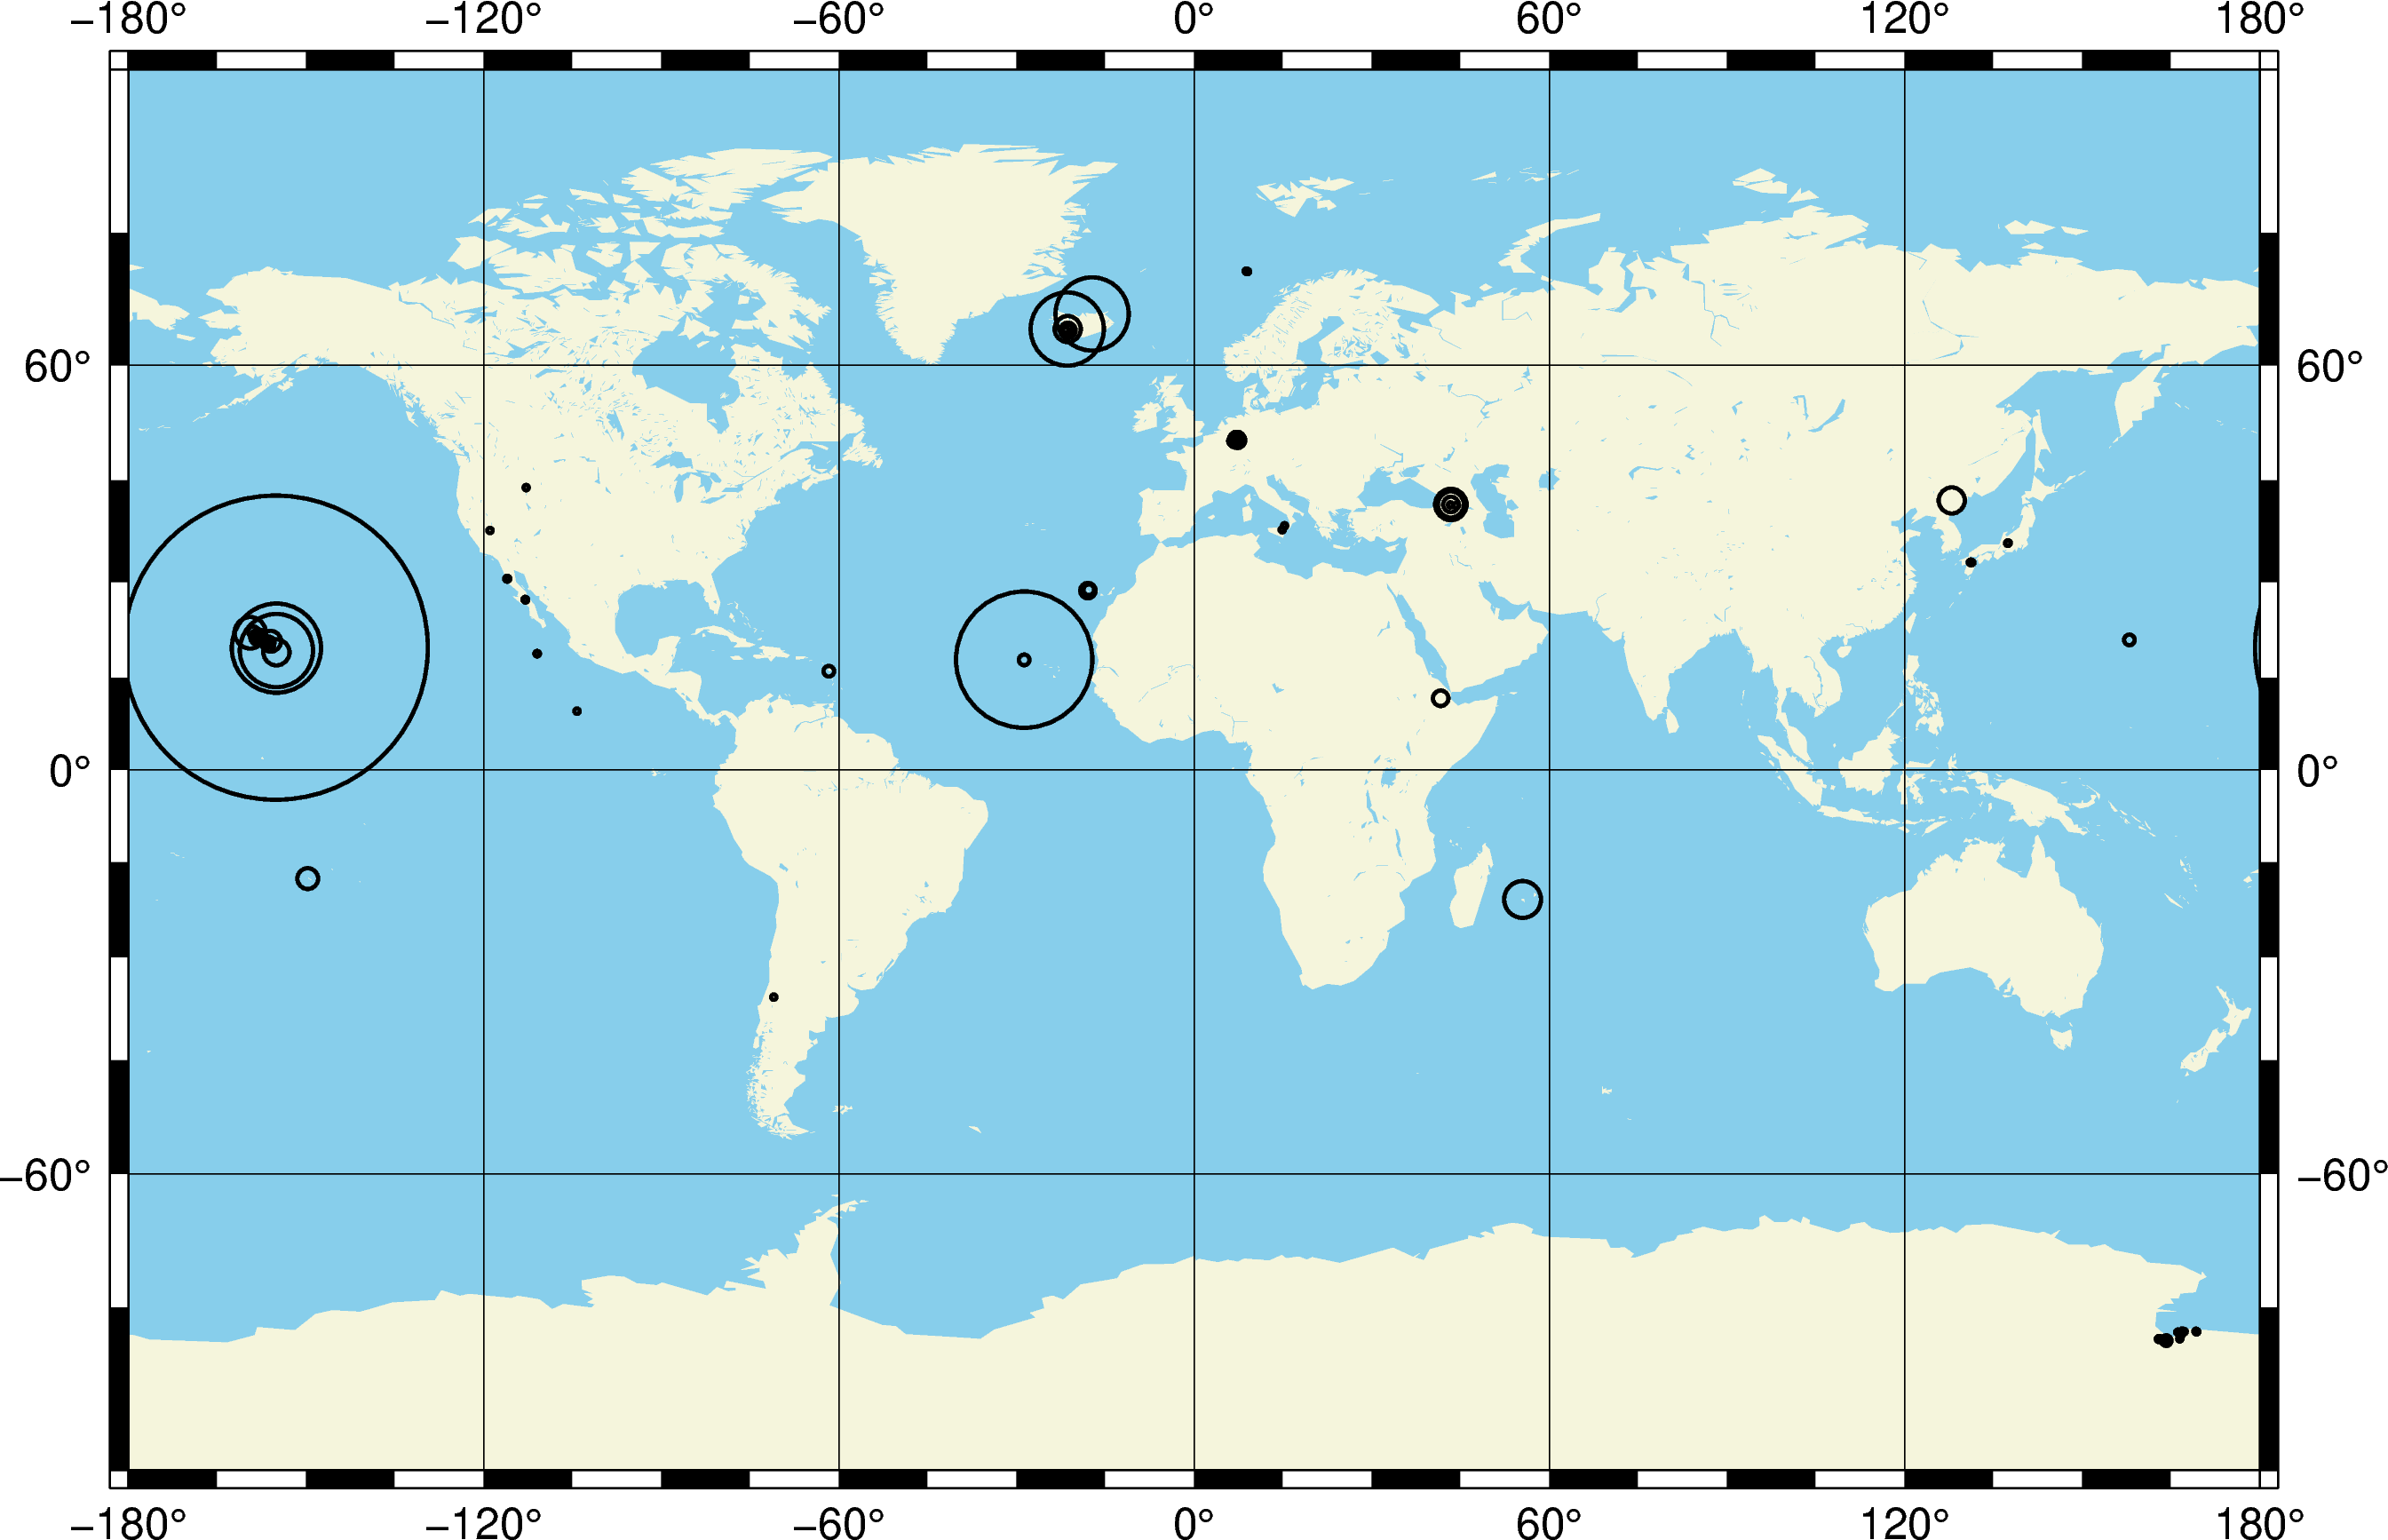

<Figure size 720x504 with 0 Axes>

In [8]:
lats = pint.groupby('SLAT').count()['SLONG'].index.values
counts = pint.groupby('SLAT').count()
counts['lat'] = counts.index.values
counts['n'] = counts['IntM']
counts = counts[['lat', "n"]]
counts = counts.merge(pint[['SLONG', "SLAT", "AGE"]], left_on="lat",right_on="SLAT",how= "left" ).drop_duplicates("SLAT")


plt.figure(12, (10,7))
fig = pygmt.Figure()

fig.coast(region = "g", frame = "afg", projection = "Cyl_stere/0/-20/8i" ,land = "beige", water = "skyblue")

#pygmt.makecpt(cmap = "viridis", series = [pint['AGE'].min(), pint['AGE'].max()])
fig.plot(x = counts['SLONG'].values, y = counts['SLAT'].values ,sizes =counts['n'].values*.05, style = "cc",pen="1")


fig.show(width =1000)

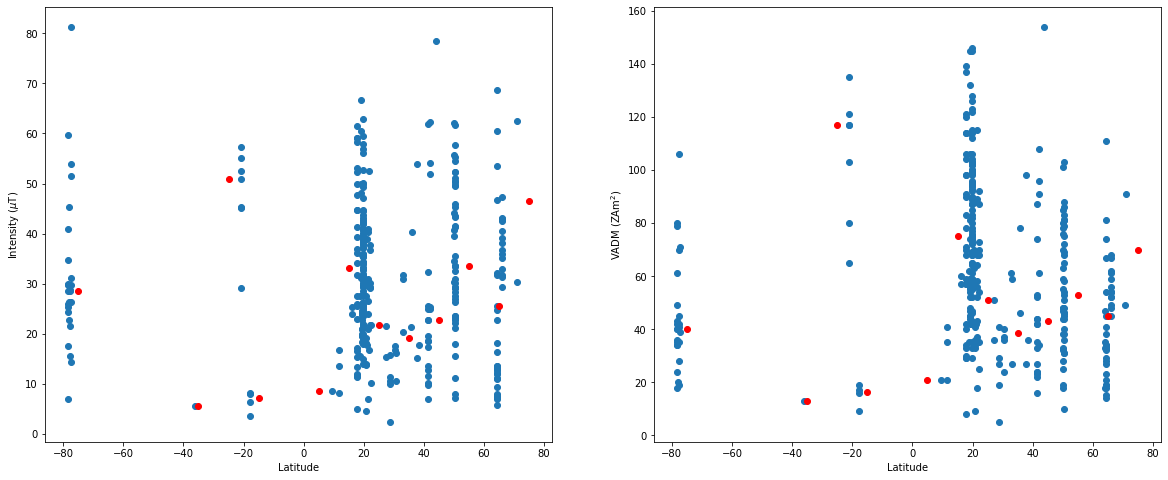

In [9]:
# filtered PINT- intensity and vadm vs. latitude
lat_range = np.arange(-90, 95, 10)

plt.figure(3, (20,8))
plt.subplot(121)
plt.plot(pint['SLAT'], pint['F'], "o")

medianIntensity = pint.groupby(pd.cut(pint['SLAT'], lat_range)).median()['F']
plt.plot(lat_range[:-1]+5, medianIntensity.values, "ro")

plt.xlabel("Latitude")
plt.ylabel("Intensity ($\mu$T)")


plt.subplot(122)
plt.plot(pint['SLAT'], pint['VDM/VADM'], "o")

medianVADM = pint.groupby(pd.cut(pint['SLAT'], lat_range)).median()['VDM/VADM']
plt.plot(lat_range[:-1]+5, medianVADM.values, "ro")


plt.xlabel("Latitude")
plt.ylabel("VADM (ZAm$^2$)");

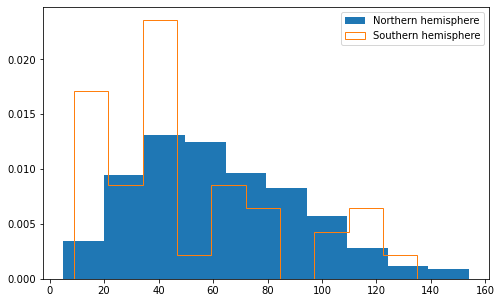

In [10]:
# PINT - northern vs. southern hemisphere
plt.figure(4, (8, 5))
pint['Hemisphere']=pint['SLAT']>=0
pint['Hemisphere']=pint['Hemisphere'].replace({True:"North", False:"South"})

north= pint[pint['Hemisphere']=="North"]
south = pint[pint['Hemisphere']=="South"]

plt.hist(north['VDM/VADM'], density = True, label = "Northern hemisphere")
plt.hist(south['VDM/VADM'], density = True,  histtype='step', label= "Southern hemisphere")
plt.legend();

In [11]:
hem_stats = pint.groupby("Hemisphere").describe()['VDM/VADM']
hem_stats['std_err']=[hem_stats.at['North',"std"]/np.sqrt(hem_stats.at['North',"count"]), \
                                    hem_stats.at['South',"std"]/np.sqrt(hem_stats.at['South',"count"])]
hem_stats

,count,mean,std,min,25%,50%,75%,max,std_err
Hemisphere,,,,,,,,,
North,291.0,62.498282,29.965771,5.0,40.0,58.0,83.0,154.0,1.756625
South,37.0,52.513514,34.499293,9.0,28.0,41.0,71.0,135.0,5.671649


In [12]:
# 2 sample Kolmogorov-Smirnov test
stats.ks_2samp(north['VDM/VADM'].values, south['VDM/VADM'].values)

KstestResult(statistic=0.2956255224296461, pvalue=0.004867192585160329)

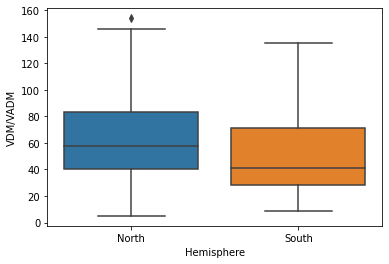

In [13]:
sns.boxplot(x="Hemisphere", y = "VDM/VADM", data = pint);

In [14]:
#find the M (g01 term) that minimizes the mean squared error 
min_mse =[np.inf, np.inf, np.inf]
mses= []

for m in np.linspace(pint['VDM/VADM'].min(), pint['VDM/VADM'].max(), 100):
   
    #intensity at the equator
    b = pmag.vdm_b(m*1e21, 0)*1e6
    
    # calculate mse 
    B_exp= b*np.sqrt(1+3 * np.cos(np.radians(90 - pint['SLAT']))**2)
    mse = sum((pint['F']-B_exp)**2)/pint['F'].size
    mses.append(mse)
    
    if mse <min_mse[0]:
        min_mse= [mse, b, m]
        
#equivalent VADM
best_vadm = min_mse[2]
 
print ("Best MSE")
print("\tmse:\t {:.2f}".format(min_mse[0]))
print("\tm:\t {:.2f} muT".format(min_mse[1]))
print("\tvadm:\t {:.2f} ZAm^2".format(best_vadm))

Best MSE
	mse:	 277.67
	m:	 21.14 muT
	vadm:	 54.67 ZAm^2


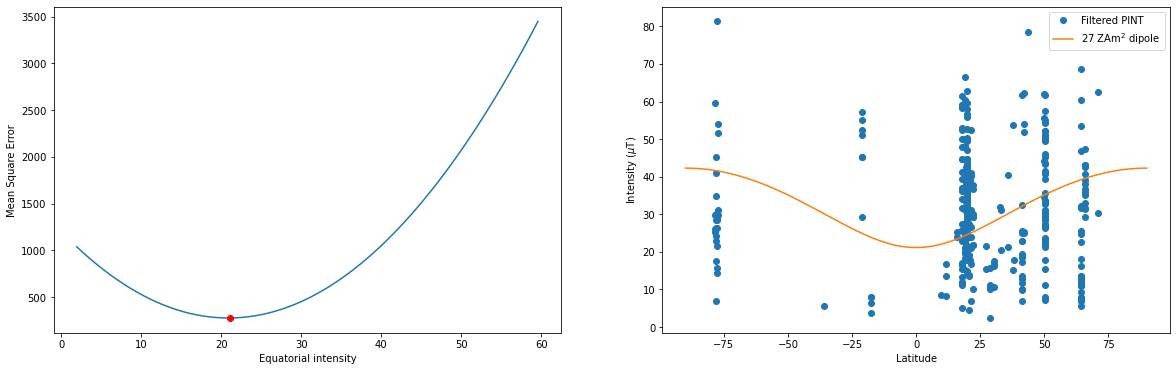

In [15]:
# mse
plt.figure(5, (20,6))

plt.subplot(121)
ms = np.linspace(pint['VDM/VADM'].min(), pint['VDM/VADM'].max(), 100)
x = pmag.vdm_b(ms*1e21, 0)*1e6
plt.plot(x, mses)

plt.xlabel("Equatorial intensity")
plt.ylabel("Mean Square Error")
plt.plot(min_mse[1],min_mse[0], "ro")




plt.subplot(122)
lats = np.linspace(-90, 90,300)
best_gad=  min_mse[1]*np.sqrt(1+3 * np.cos(np.radians(90 - lats))**2)
best_vadm = pmag.b_vdm( min_mse[1]*1e-6, 90)/1e21

plt.plot(pint['SLAT'], pint['F'], "o", label = "Filtered PINT")
plt.plot(lats, best_gad, label="{} ZAm$^2$ dipole".format(int(best_vadm)))
plt.xlabel("Latitude")
plt.ylabel("Intensity ($\mu$T)")
plt.legend();

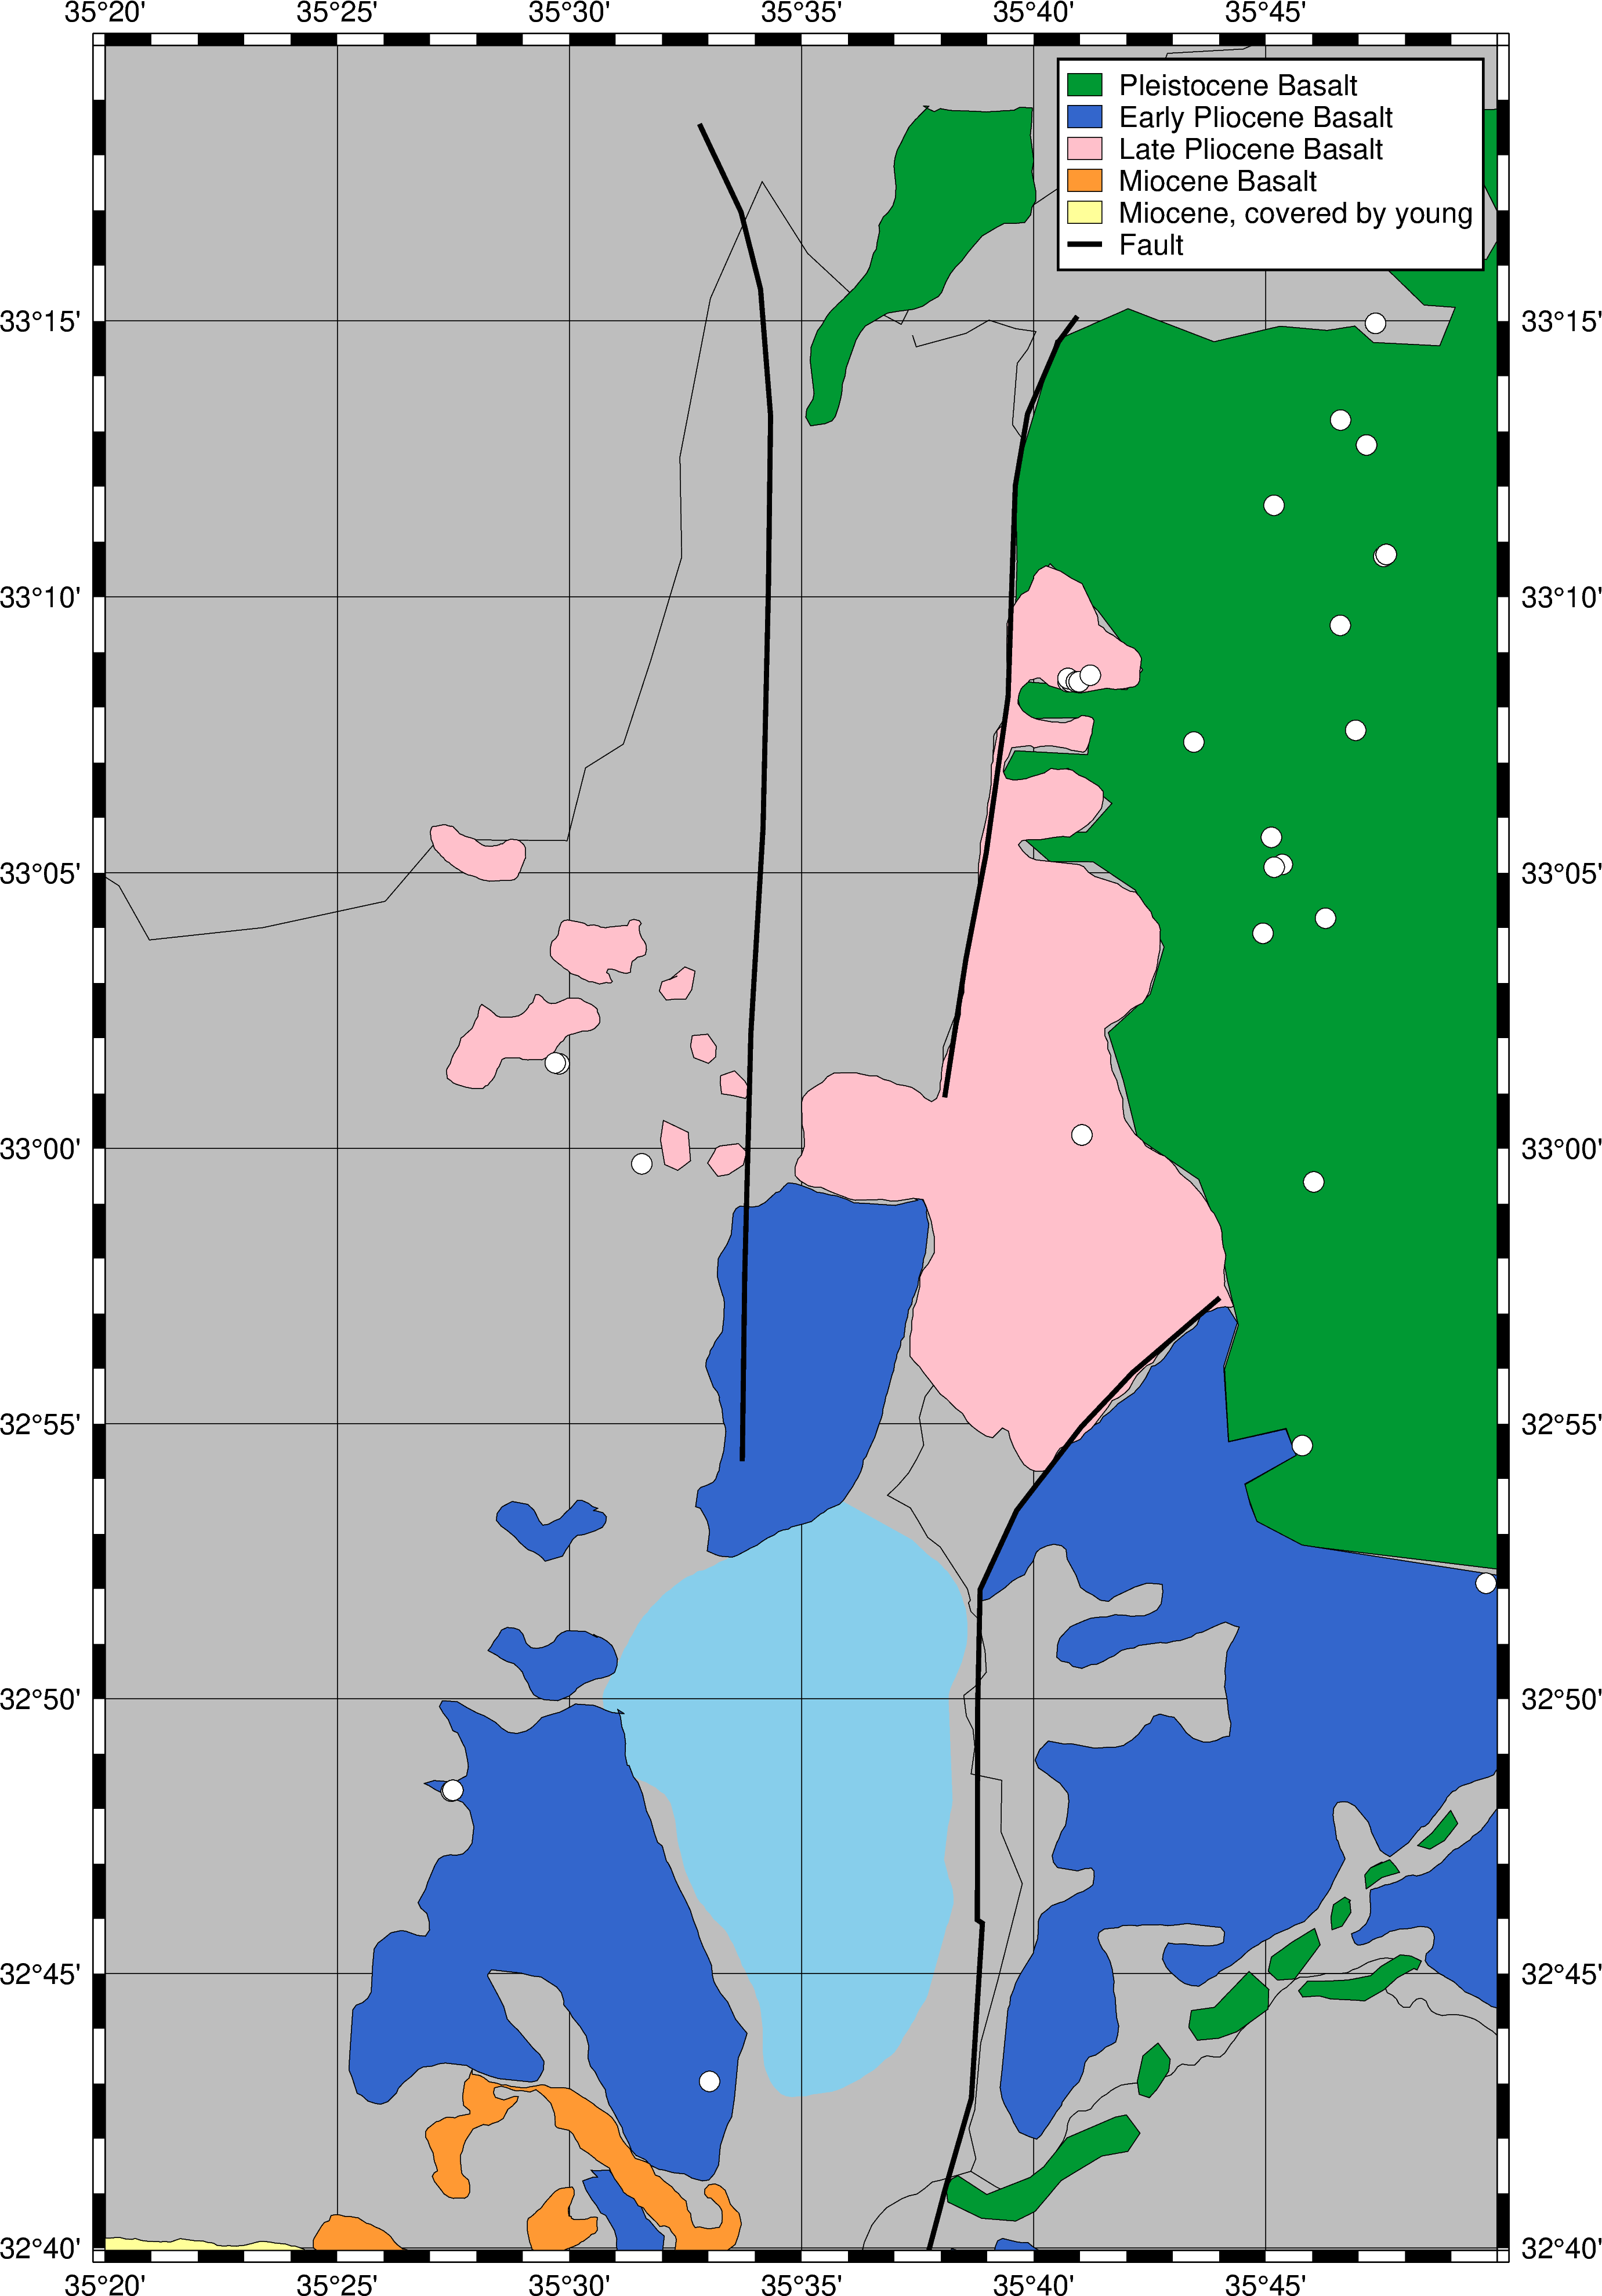

In [16]:
# site map
boundaryData = pd.read_csv("../Data/geo_regions.csv")
boundaryData['lat']= pd.to_numeric(boundaryData['lat'])
coordinateData = pd.read_csv("../Data/coordinates.csv")

lon = [35.3333, 35.833]
lat = [32.666, 33.333]
padding = 20

# relief image for Israel, border, inset, color bar
fig = pygmt.Figure()


fig.coast(projection = "M0/0/8i", region = [lon[0], lon[1],lat[0], lat[1]], frame = "afg", land = "gray", water = "skyblue", borders = 1)


colors=["#009933", "#3366cc", "pink", "#ff9933", "#ffff99", "#00cc99", "#669999"]
#periods = ["Pleistocene", "Late Pleistocene", "Early Pliocene", "Miocene", "Miocene, covered by young"]
periods = ["Pleistocene Basalt",  "Early Pliocene Basalt", "Late Pliocene Basalt", "Miocene Basalt", "Miocene, covered by young"]

for i, period in enumerate(periods):
    regions = boundaryData[boundaryData['period']==period]
    for j in regions['zone'].unique():
        regionData = regions[regions['zone']==j]
        if (j == 1):
            fig.plot(x =regionData['lon'].values, y = regionData['lat'].values , color = colors[i], pen = "black", label = '"' + period +'"')
        else:
            fig.plot(x =regionData['lon'].values, y = regionData['lat'].values , color = colors[i], pen = "black")


#plot intensity sites
intensitySites = coordinateData[coordinateData['Site'].str.contains("GHI")]
directionSites = coordinateData[coordinateData['Site'].str.contains("GHI")==False]
#fig.plot(x = directionSites['Lon'].values, y = directionSites['Lat'].values , style = "c0.3c", color = "grey", pen = "black")
fig.plot(x = intensitySites['Lon'].values, y =intensitySites['Lat'].values , style = "c0.3c", color = "white", pen = "black")


for i in np.arange(1,3,1):
    lat_line, lon_line = boundaryData[(boundaryData['period']=="Fault") & (boundaryData['zone'] == i)][['lat','lon']].values.transpose()
    
    fig.plot(
        x=lon_line,
        y=lat_line,
        pen="2p,black",
    )
    
lat_line, lon_line = boundaryData[(boundaryData['period']=="Fault") & (boundaryData['zone'] == 3)][['lat','lon']].values.transpose()
fig.plot(
        x=lon_line,
        y=lat_line,
        pen="2p,black",
        label="Fault"
    )


fig.legend()
fig.show(width=1000)


# Regional Anomaly/South Atlantic Anomaly

In [17]:
current_vadm = pmag.b_vdm(30 *1e-6, 0)#/1e21
saa_lat = -25
saa_expected = pmag.vdm_b(current_vadm, saa_lat )*1e6


golan_vadm = 64.87*1e21
sigma = 5.3
ant_lat = 78.01

ant_expected = [pmag.vdm_b(golan_vadm-sigma*1e21,ant_lat)*1e6, pmag.vdm_b(golan_vadm,ant_lat)*1e6,pmag.vdm_b(golan_vadm+ sigma*1e21,ant_lat)*1e6]
ant_observed = 33
print("Antarctica expected {}".format(ant_expected))


anomaly = np.array(ant_expected) - ant_observed
print("Anomaly size: {} - {} uT".format(anomaly[0], anomaly[2]))

Antarctica expected [45.32001697444446, 49.352182325536546, 53.38434767662864]
Anomaly size: 12.320016974444457 - 20.384347676628643 uT


# Simulation

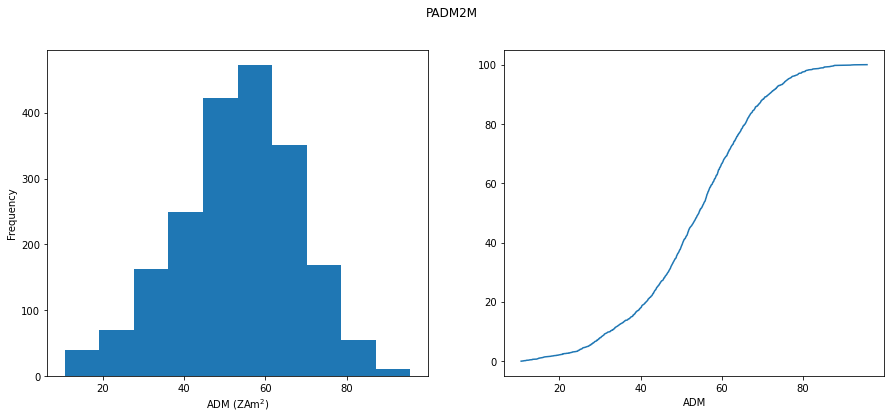

In [18]:
#1. read in padm2m
padm2m =pd.read_csv("./padm2m.adms.1k", header = None, delim_whitespace = True)
padm2m.columns = ['age', 'ADM', "derivative", "second_derivative"]
padm2m['ADM']*=10


plt.figure(14, (15,6))

plt.subplot(121)
plt.hist(padm2m ['ADM'])
plt.xlabel("ADM (ZAm$^2$)")
plt.ylabel("Frequency")

plt.subplot(122)
plt.plot(sorted(padm2m['ADM'].values), np.linspace(0,100, padm2m['age'].size))
plt.xlabel('ADM')

plt.suptitle("PADM2M");

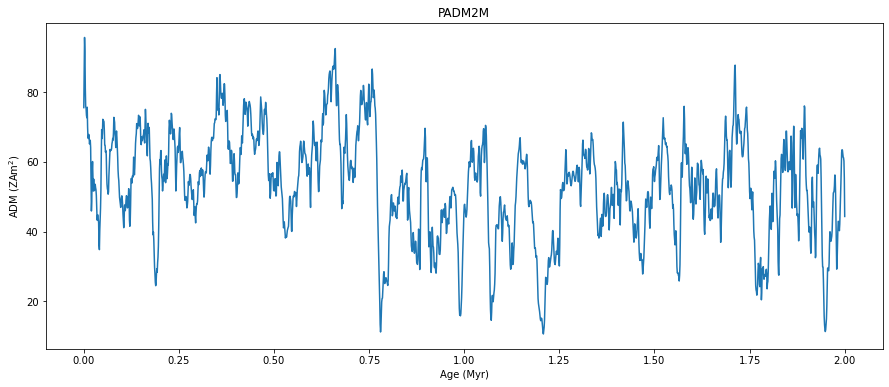

In [19]:
plt.figure(15, (15,6))
plt.plot(padm2m['age'], padm2m['ADM'])
plt.ylabel("ADM (ZAm$^2$)")
plt.xlabel("Age (Myr)")
plt.title("PADM2M");

In [20]:
def simulation(data):
    n = padm2m['ADM'].size
    sim_lat, sim_intensity= [], []

    # 1. sample n vadms
    vadms = np.random.choice(padm2m['ADM'], size =n , replace = False) *1e21

    # 2. segment pint into n age bins
    group = data.groupby(pd.cut(data['AGE'], np.linspace(0, data['AGE'].max(), n)))


    # 3. for each age bin, calculate the the expeced intensity and at the given lat, lon
    for g, v in zip(group.groups, vadms):
        try:
            interval = group.get_group(g)
            sim_intensity.extend(pmag.vdm_b(v, interval['SLAT'].values)*1e6)
            sim_lat.extend(interval['SLAT'].values)
        except: 
            continue

    return [sim_lat, sim_intensity]

def plot_simulation(sim_lat, sim_intensity, title = "Simulation"):
    sim = pd.DataFrame(columns = ['lat', 'int'], data = np.array([sim_lat, sim_intensity]).transpose())
    lat_range = np.arange(-90, 90, 10)
    

    # calculate median intensity of each 10 degree latitude bin if n>=10
    median_int, latitudes = [], []
    for lat in lat_range:
        lat_interval_data = sim[(sim['lat']>=lat) & (sim['lat']< lat+10)]

        if lat_interval_data['lat'].size >=10:
            median_int.append(lat_interval_data['int'].median())
            latitudes.append(lat)


    plt.figure(0, (5, 4))
    
    #plt.subplot(121)
    plt.plot(sim['lat'], sim['int'], "o")
    plt.plot(latitudes, median_int, "ro")
    plt.title(title)
    plt.xlabel("Latitude ($^\circ$)")
    plt.ylabel("Intensity ($\mu$T)")
    

    #vs = []
    #for b, la in zip(median_int, lat_range[:-1]):
     #   if b != np.nan:
      #      vs.append(pmag.b_vdm(b*1e-6, la)*1e-21)

    #plt.subplot(122)
    #plt.plot(lat_range[:-1],vs,"o", color="orange")
    #plt.xlabel("Latitude ($^\circ$)")
    #plt.ylabel("VADM (ZAm$^2$)")
    
def find_mse(lats, intensities):
    min_mse =[np.inf, np.inf, np.inf]
    mses= []

    for m in np.linspace(padm2m['ADM'].min(), padm2m['ADM'].max(), 100):
        #intensity at the equator
        b = pmag.vdm_b(m*1e21, 0)*1e6
    
        # calculate mse 
        B_exp= b*np.sqrt(1+3 * np.cos(np.radians(90 - lats))**2)
        mse = sum((intensities-B_exp)**2)/intensities.size
        mses.append(mse)
        
        
        if mse <min_mse[0]:
            min_mse= [mse, b, m]
        
        return min_mse # [mean square error, intensity at equator, VADM]

## Unfiltered PINT simulation

In [21]:
def check_asymmetry(data):
    count = 0;
    p_vals = []
    north_pdms, south_pdms = [], []
    for ind in np.arange(100):
        lats = np.array(data.iloc[ind]['lat'])
        ints = np.array(data.iloc[ind]['int'])

        rows = np.where(lats>0)
        no_lats = lats[rows]
        no_ints = ints[rows]

        rows = np.where(lats<0)
        so_lats = lats[rows]
        so_ints = ints[rows]

        no_vadm = [pmag.b_vdm(b*1e-6, l)*1e-21 for b, l in zip (no_ints, no_lats)]
        so_vadm = [pmag.b_vdm(b*1e-6, l)*1e-21 for b, l in zip (so_ints, so_lats)]

        north_pdms.append(np.median(np.array(no_vadm)))
        south_pdms.append(np.median(np.array(so_vadm))) 

        p = stats.ks_2samp(no_vadm, so_vadm)[1]
        p_vals.append(p)

        if p>=.05:
            count+=1  
            
    return north_pdms, south_pdms, count

#check equator vs. poles
def check_pole_to_eq(data):
    pole_to_eq = []
    for ind in np.arange(100):
        lats = np.array(data.iloc[ind]['lat'])
        ints = np.array(data.iloc[ind]['int'])

        rows = np.logical_and(lats>-80, lats < -70 )
        so_ints= ints[rows]

        rows = np.logical_and(lats>60, lats< 70 )
        no_ints= ints[rows]

        rows = np.logical_and(lats>-10, lats< 10 )
        eq_ints= ints[rows]



        s, n, eq = np.median(so_ints), np.median(no_ints), np.median(eq_ints)
        pole_to_eq.append(n/eq)
        pole_to_eq.append(s/eq)
    return pole_to_eq

#check mid-latitudes vs. poles
def check_pole_to_mid(data):
    pole_to_mid = []
    for ind in np.arange(100):
        lats= np.array(data.iloc[ind]['lat'])
        ints = np.array(data.iloc[ind]['int'])

        rows = np.logical_and(lats >-70, lats < -40 )
        so_mid= ints[rows]

        rows = np.logical_and(lats>30, lats< 60 )
        no_mid= ints[rows]

        rows = np.logical_and(lats>60, lats< 70 )
        no_pole= ints[rows]

        rows = np.logical_and(lats>-80, lats < -70 )
        so_pole= ints[rows]

        pole_to_mid.append(np.median(so_pole)/np.median(so_mid))
        pole_to_mid.append(np.median(no_pole)/np.median(no_mid))
        
    return pole_to_mid
    

In [22]:
# UNFILTERED dataset0 - 5 Myr
pint5 = pd.read_csv("../Data/PINT15.csv")
ageFilter = 5
pint5 = pint5[(pint5['AGE']<ageFilter)]
pint5= pint5[['SLAT', "SLONG", "AGE", 'IntM', "Ndir", "INC", "DEC", "k", 'a95',"Nint", "F", "VDM/VADM", "DF", "DF%" ]]
pint5['VDM/VADM']*=10


print("N = {}\t pint unfiltered 0 - 5 Myr ".format(pint5['AGE'].size))

N = 1831	 pint unfiltered 0 - 5 Myr 


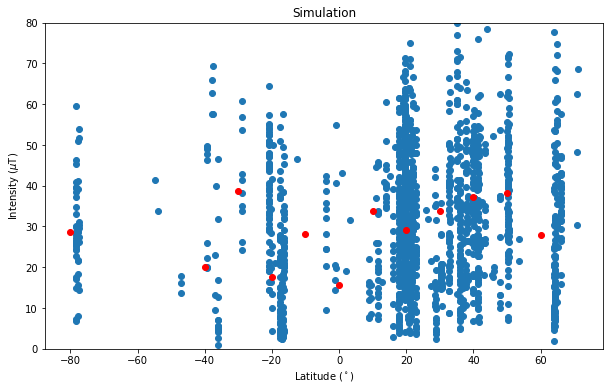

In [23]:
# view the unfiltered dataset
plot_simulation(pint5['SLAT'], pint5['F'])

fig = plt.gcf()
fig.set_size_inches(10,6)

ax = plt.gca()
ax.set_ylim(0,80);

In [24]:
# run the simulation- # unfiltered
trials  = 100

mses = []
sim_latitudes= []
sim_intensities = []
for n in np.arange(trials):
    sim_lat, sim_intensity= simulation(pint5[['SLAT', "AGE"]])
    m = find_mse(np.array(sim_lat), np.array(sim_intensity))
    mses.append(m[0])
    sim_latitudes.append(sim_lat)
    sim_intensities.append(sim_intensity)
    
    
    
sim_data5 = pd.DataFrame(columns = ['mse', 'lat', 'int'], data = np.array([mses, sim_latitudes, sim_intensities]).transpose())
sim_data5 = sim_data5.sort_values(by = "mse")

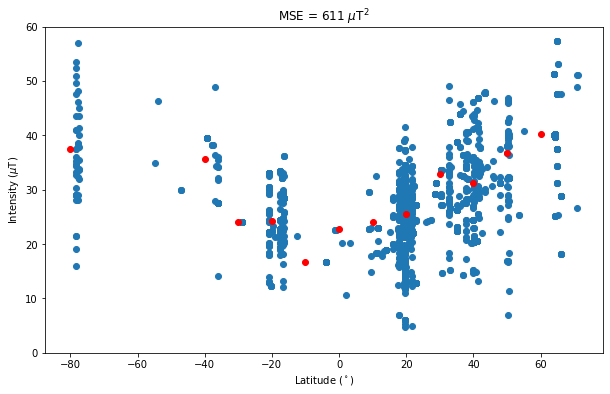

In [25]:
# view the results of the unfiltered simulation 
ind =np.random.choice(100, size = 1)[0]
plot_simulation(sim_data5.iloc[ind]['lat'], sim_data5.iloc[ind]['int'], "MSE = {} $\mu$T$^2$".format(round(sim_data5.iloc[ind]['mse'])))

fig = plt.gcf()
fig.set_size_inches(10, 6)

ax = plt.gca()
ax.set_ylim(0,60);

9% may be symmetrical


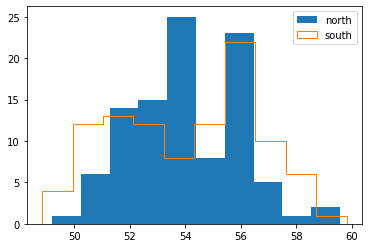

In [26]:
#check asymmetry
north_pdms, south_pdms, count =check_asymmetry(sim_data5)

print("{}% may be symmetrical".format(count))

plt.hist(north_pdms, label= "north")
plt.hist(south_pdms, label = "south", histtype = "step")
plt.legend();

83.0% poles are roughly 2 times stronger at the poles than the equator


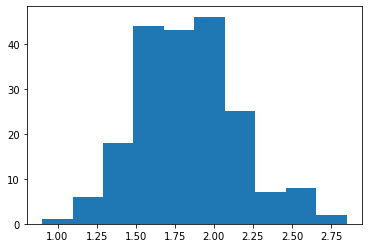

In [27]:
#check equator vs. poles
pole_to_eq= check_pole_to_eq(sim_data5)

plt.hist(pole_to_eq)

twos= [round(p, 0) for p in pole_to_eq].count(2)
print("{}% poles are roughly 2 times stronger at the poles than the equator".format(twos/len(pole_to_eq)*100))

14.499999999999998% of the time poles are weaker than mid-latitudes


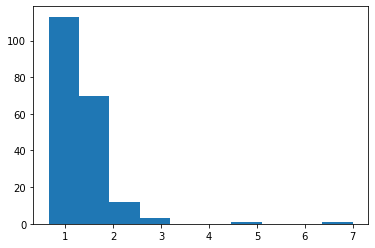

In [28]:
#check mid-latitudes vs. poles
pole_to_mid = check_pole_to_mid(sim_data5)
    
plt.hist(pole_to_mid)

weak_poles= sum([1 for p in pole_to_mid if p<1])

print("{}% of the time poles are weaker than mid-latitudes".format(weak_poles/len(pole_to_mid)*100))

# Filtered PINT simulation

In [29]:
# FILTERED dataset 
pint= pd.read_csv("../Data/PINT15.csv")
ageFilter = 5
pint = pint[(pint['AGE']<ageFilter)]

pint['DF%'] = pint['DF%'].replace(' -    ', np.nan)
pint = pint.dropna(subset=['DF%', 'DF', "VDM/VADM"])
pint['AGE'] = pint['AGE'].astype('float')
pint['DF%'] = pint['DF%'].astype('float')
pint['DF'] = pint['DF'].astype('float')

# apply pint quality filters 
dfPercFilter = 10
dfFilter = 4
n_filter = 3
intMFilter= ['LTD-T+', "M+", "ST+", "T+", "WT+"]



pint = pint[pint['IntM'].isin(intMFilter)]
pint = pint[(pint['Nint']>=n_filter) & ((pint['DF%']<=dfPercFilter) | (pint['DF']<=dfFilter)) ]
print("N = {}\t pint filtered  0 - 5 Myr ".format(pint['AGE'].size))

N = 328	 pint filtered  0 - 5 Myr 


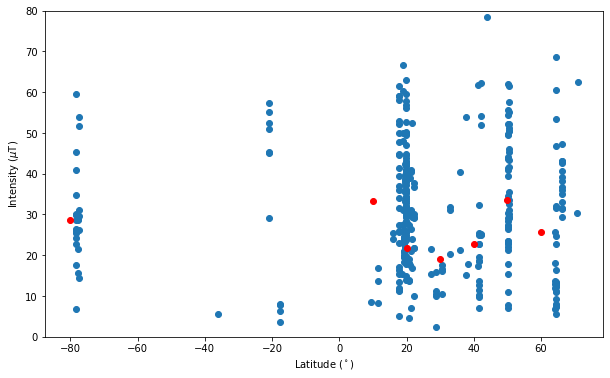

In [30]:
#view the filtered dataset
plot_simulation(pint['SLAT'], pint['F'], "")

fig = plt.gcf()
fig.set_size_inches(10,6)

ax = plt.gca()
ax.set_ylim(0,80);

In [31]:
# run the filtered simulation
trials  = 100

mses = []
sim_latitudes= []
sim_intensities = []
for n in np.arange(trials):
    sim_lat, sim_intensity= simulation(pint[['SLAT', "AGE"]])
    m = find_mse(np.array(sim_lat), np.array(sim_intensity))
    mses.append(m[0])
    sim_latitudes.append(sim_lat)
    sim_intensities.append(sim_intensity)
    
    
    
sim_data = pd.DataFrame(columns = ['mse', 'lat', 'int'], data = np.array([mses, sim_latitudes, sim_intensities]).transpose())
sim_data = sim_data.sort_values(by = "mse")

(0.0, 80.0)

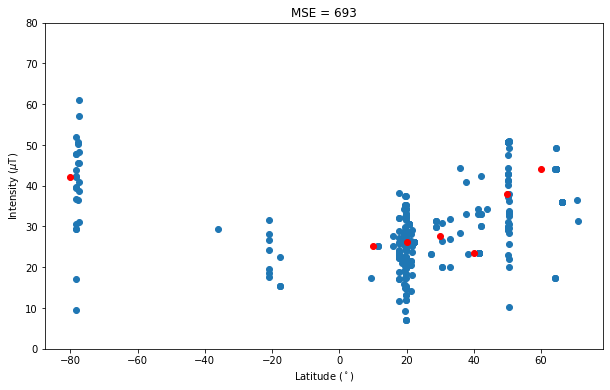

In [32]:
# view the results of the filtered simulation
ind = np.random.choice(100, size = 1)[0]
plot_simulation(sim_data.iloc[ind]['lat'], sim_data.iloc[ind]['int'], "MSE = {}".format(round(sim_data.iloc[ind]['mse'])))

fig = plt.gcf()
fig.set_size_inches(10,6)

ax = plt.gca()
ax.set_ylim(0,80)

77% may be symmetrical


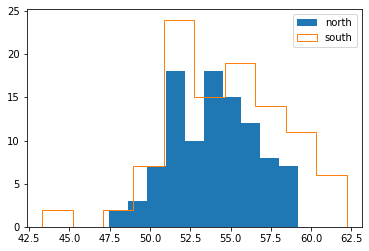

In [33]:
# check asymmetry
north_pdms, south_pdms, count = check_asymmetry(sim_data)

print("{}% may be symmetrical".format(count))

plt.hist(north_pdms, label= "north")
plt.hist(south_pdms, label = "south", histtype = "step")
plt.legend();

56.49999999999999% poles are roughly 2 times stronger at the poles than the equator


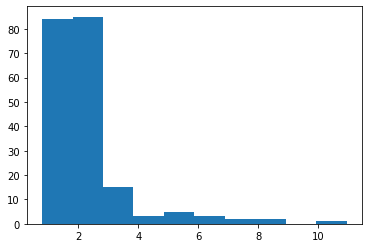

In [34]:
#check pole to equator
pole_to_eq = check_pole_to_eq(sim_data)
plt.hist(pole_to_eq)

twos= [round(p, 0) for p in pole_to_eq].count(2)
print("{}% poles are roughly 2 times stronger at the poles than the equator".format(twos/len(pole_to_eq)*100))

16.5% of the time poles are weaker than mid-latitudes


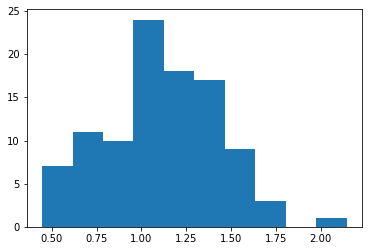

In [35]:
# check pole to mid latitudes
pole_to_mid = check_pole_to_mid(sim_data)
plt.hist(pole_to_mid)

weak_poles= sum([1 for p in pole_to_mid if p<1])

print("{}% of the time poles are weaker than mid-latitudes".format(weak_poles/len(pole_to_mid)*100))